In [1]:
import blackjax
import jax

def run_unadjusted(logdensity_fn, num_steps, initial_position, key, transform):
    init_key, tune_key, run_key = jax.random.split(key, 3)

    # create an initial state for the sampler
    initial_state = blackjax.mcmc.discrete_rescaling.init(
        position=initial_position, logdensity_fn=logdensity_fn, rng_key=init_key
    )

    # print(initial_state)
    # raise Exception

    # use the quick wrapper to build a new kernel with the tuned parameters
    sampling_alg = blackjax.discrete_rescaling(
        logdensity_fn,
        L=1.0,
        step_size=.5,
        # L=L,
        # step_size=step_size,
    )

    # run the sampler
    _, samples = blackjax.util.run_inference_algorithm(
        rng_key=run_key,
        initial_state=initial_state,
        # initial_state=initial_state,
        inference_algorithm=sampling_alg,
        num_steps=num_steps,
        transform=transform,
        progress_bar=True,
    )

    return samples

Array([0.99999994, 0.99999994, 1.        , ..., 1.        , 0.99999994,
       1.        ], dtype=float32)

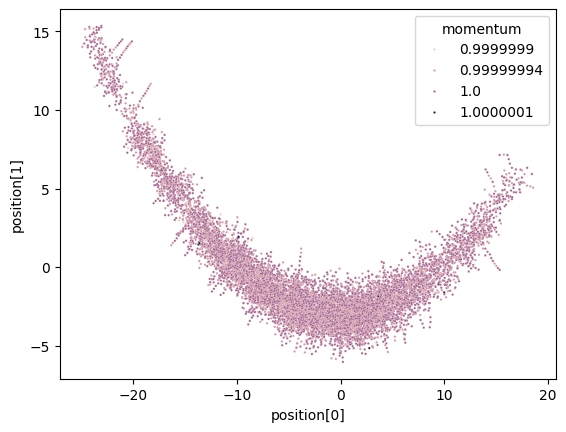

In [2]:
import jax.numpy as jnp

import sys
sys.path.append('../')
from benchmarks.inference_models import Banana, StandardNormal

# Define the log density function for the 2D standard normal distribution

model = Banana()
# logdensity_fn = lambda x: -jnp.sum(x**2)

num_steps = 10000
initial_position = model.sample_init(jax.random.PRNGKey(0))

# Set the random key
key = jax.random.PRNGKey(0)

# Run the `run_adjusted` function
samples = run_unadjusted(model.logdensity_fn, num_steps, initial_position, key, transform=lambda state, info: (state))

import pandas as pd


df = pd.DataFrame({'position[0]': samples.position[:, 0], 'position[1]': samples.position[:, 1], 'momentum': jnp.linalg.norm(samples.momentum, axis=1)  })

import seaborn as sns

sns.scatterplot(data=df, x='position[0]', y='position[1]', hue='momentum',s=3)

jnp.linalg.norm(samples.momentum, axis=1)

# df
# print(samples.shape)

# # Print the samples
# # # print(samples)
# import matplotlib.pyplot as plt

# color_values = jnp.zeros_like(samples[:, 0])+1

# plt.plot(samples[:, 0], samples[:, 1], c=color_values, marker='o', cmap='viridis')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.axis('equal')
# plt.title('MCHMC (no bounces, yes rescaling)')
# plt.show()



